In [4]:
# seaborn, pandas 모듈설치
# !pip install seaborn
# !pip install pandas

In [39]:
import seaborn as sns
import pandas as pd

In [40]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [41]:
titanic = sns.load_dataset("titanic")

In [42]:
titanic.to_csv('./data/titanic.csv', index=False)

In [43]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [44]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
# (비어있는) age = median 중앙값으로 채운다

In [45]:
titanic['embarked'].value_counts()
# embarked 승선지값 갯수 확인

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [46]:
titanic['embarked'] = titanic['embarked'].fillna('S')

In [47]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [48]:
titanic['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [49]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [50]:
titanic['deck'] = titanic['deck'].fillna('C')  

In [51]:
# 데이터 정제 작업(결측치 삭제)

In [52]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [53]:
# 데이터 탐색
# info() 기본정보 확인

In [54]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [55]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [56]:
# pclass, class : 객실등금
# sibsp : 함께 탑승한 형제자매와 배우자수(가족?)
# parch : 함께 탑승한 부모/자식 수
# embarked, embark_town : 탑승항구
# adult_male : 성인남자
# alone : 동행여부 True/Falseabs

In [57]:
import matplotlib.pyplot as plt

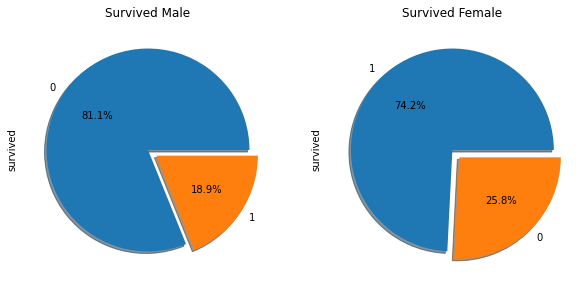

In [58]:
f,ax = plt.subplots(1,2,figsize = (10,5))

titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)

titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)

ax[0].set_title('Survived Male')

ax[1].set_title('Survived Female')

plt.show()

c:\developer\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


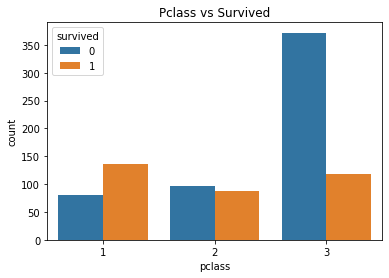

In [59]:
# 객실 등ㅇ급 카테고리별 생존자 수 계산, 차트로 표현
# seaborn패키지의 countplot() 함수 사용
sns.countplot('pclass', hue = 'survived', data = titanic)
plt.title('Pclass vs Survived')
plt.show()

In [60]:
# EDA :  Exploratory Data Analysis

In [61]:
titanic_corr = titanic.corr(method = 'pearson')
# 숫자데이터로 이루어진 것만 상관관계 분석을 할 수 있다.
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [62]:
titanic_corr.to_csv('data/titanic_corr.csv', index=False)

In [63]:
titanic['survived'].corr(titanic['age'])

-0.06491041993052585

In [64]:
# 결과 시각화

ValueError: object arrays are not supported

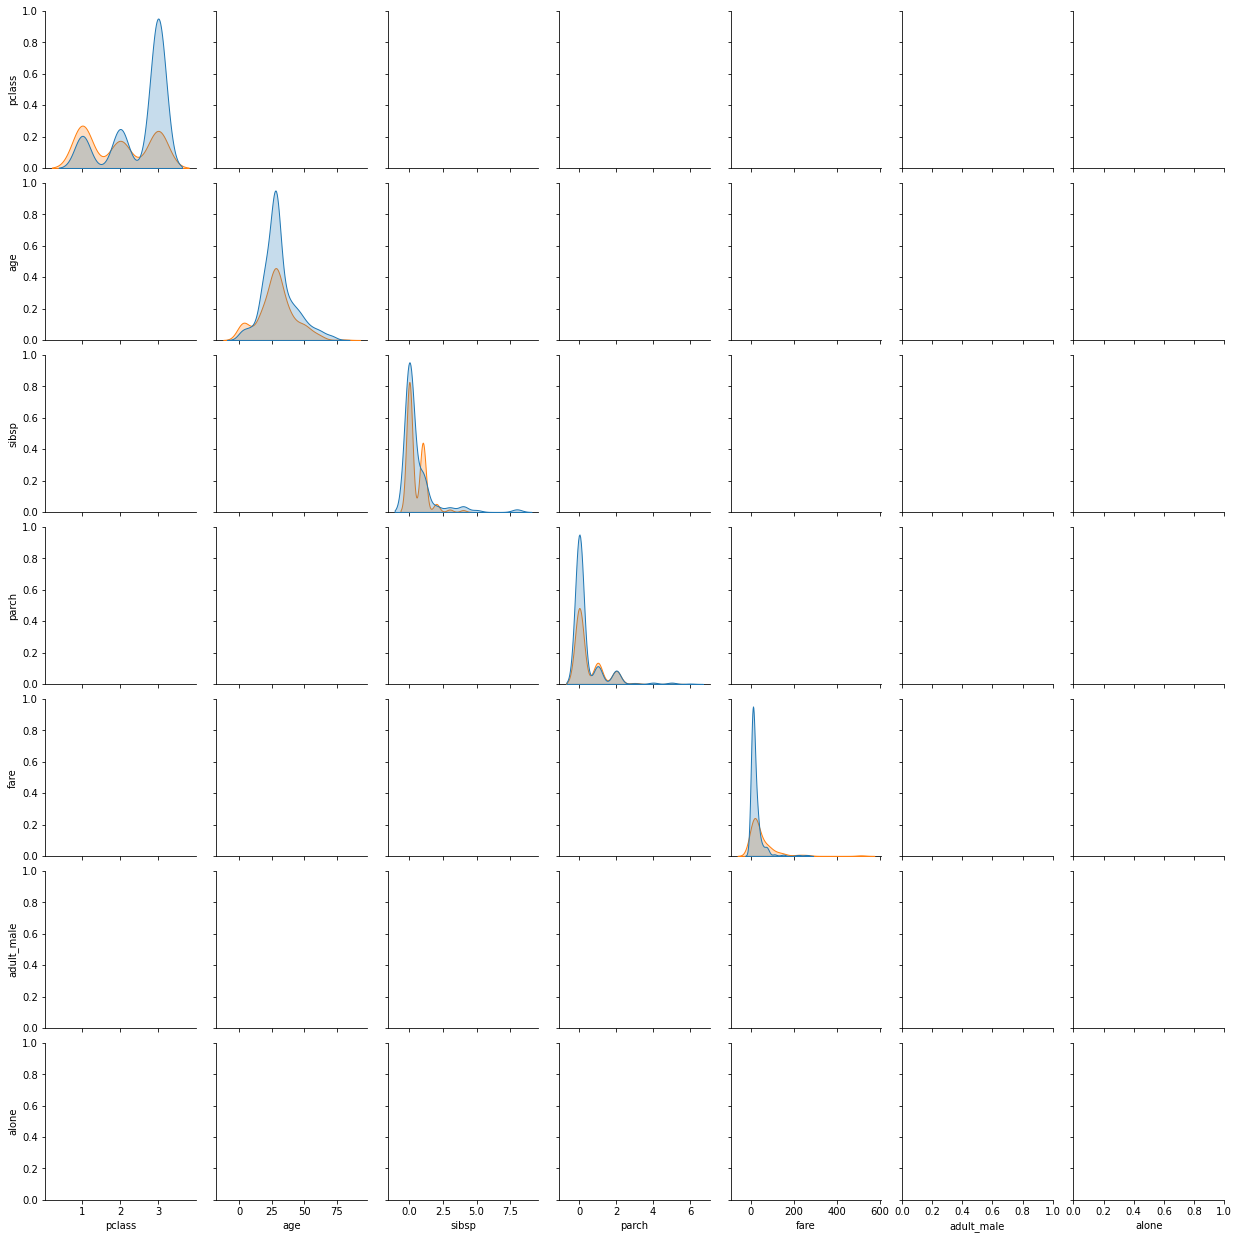

In [65]:
sns.pairplot(titanic, hue='survived')
plt.show()

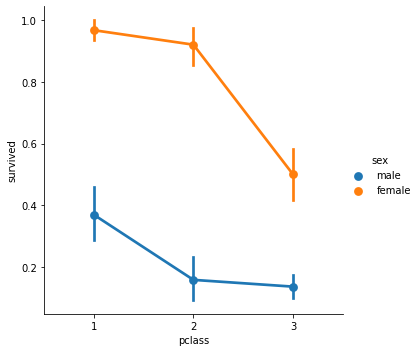

In [66]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')
plt.show()

In [67]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [68]:
titanic['age2'] = titanic['age'].apply(category_age)

In [69]:
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

In [70]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

In [71]:
titanic.to_csv('data/titanic3.csv', index =False)

In [72]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass',
'fare']]

In [73]:
colormap = plt.cm.RdBu

<AxesSubplot:>

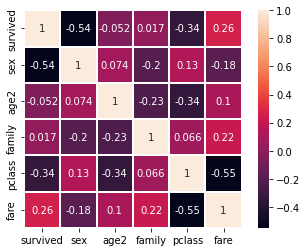

In [74]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax
= 1.0, square = True, linecolor = 'white', annot = True,
annot_kws = {"size": 10})

In [38]:
plt.show()

In [118]:
data=pd.read_csv('./data/titanic.csv')

In [119]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [120]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [121]:
data.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

In [122]:
pd.crosstab(data.pclass,data.survived,margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

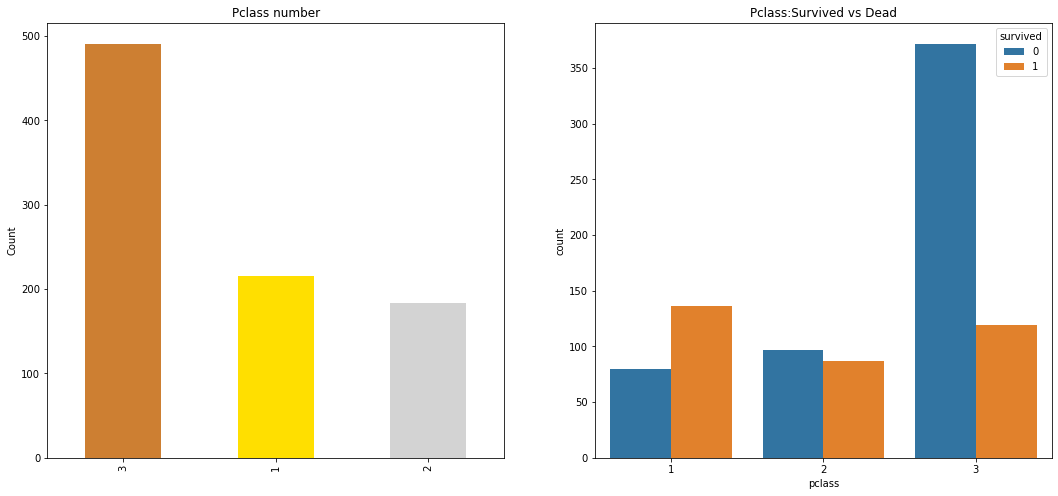

In [125]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Pclass number')
ax[0].set_ylabel('Count')
sns.countplot('pclass',hue='survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


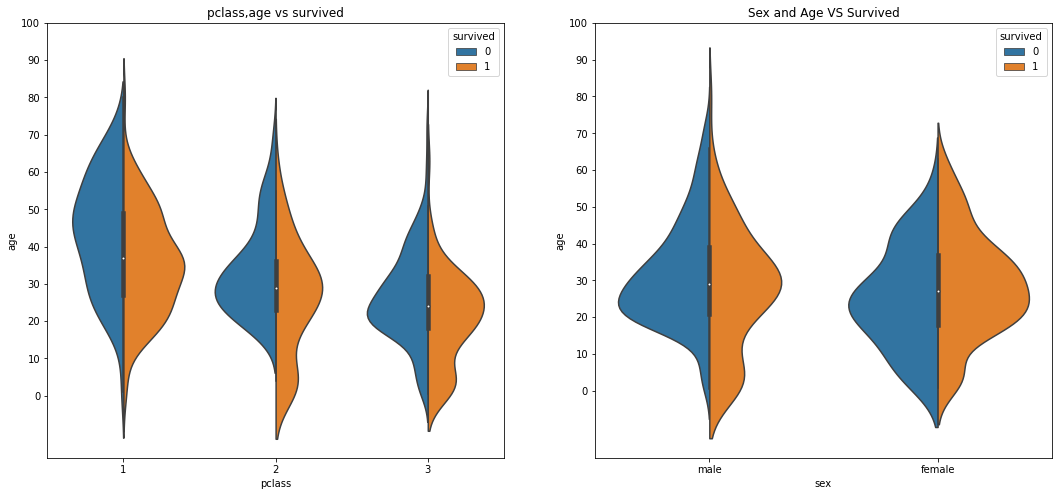

In [127]:
f, ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot('pclass','age', hue = 'survived', data=data, split=True, ax=ax[0])
ax[0].set_title('pclass,age vs survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("sex","age",hue="survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()